In [1]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import h5py as h5
import tqdm
%matplotlib inline
reload(sa)
reload(sc)

blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'

blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site16_Z2865__B604_cat_P01_S16_1/'
blockPath = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
#Load simplicial chain generator dictionary
scgfss = glob.glob(os.path.join(blockPath, 'scg/*.scg'))
print(scgfss)

['/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170509T154454Z-10.0-5.0-13.0-SD-incorrect-narrow-shuffle.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170509T154454Z-10.0-5.0-13.0-SD-incorrect-wide-shuffle.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170503T170803Z-10.0-5.0-13.0-Targ-correct-wide-shuffle.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-narrow.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-wide.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170503T170803Z-10.0-5.0-13.0-Targ-corr

In [2]:
apdict = {'A':'active', 'P':'passive'}
cidict = {'C':'correct', 'I':'incorrect'}
widthdict= {'W':'wide', 'N':'narrow', 'B':''}
periods = ['SD', 'Targ']
widths = ['W', 'N', 'B']
widths = ['W', 'N']
ap = ['A', 'P']
ci = ['C', 'I']
fnames = {}
for p in periods:
    k = []
    for a in ci:
        for w in widths:
            if w == 'B':
                q = ''
            else:
                q = '-{}'.format(widthdict[w])
            k.append(p + '-' + cidict[a] + q +'.scg')
    fnames[p] = k
print(fnames)

{'Targ': ['Targ-correct-wide.scg', 'Targ-correct-narrow.scg', 'Targ-incorrect-wide.scg', 'Targ-incorrect-narrow.scg'], 'SD': ['SD-correct-wide.scg', 'SD-correct-narrow.scg', 'SD-incorrect-wide.scg', 'SD-incorrect-narrow.scg']}


In [3]:
def JS_vs_beta_pairwise(beta, stim, scgSD, scgT, d):
    divsave = []
    divincsave = []
    diffsave = []
    ntrials = min([len(scgSD[stim]), len(scgT[stim])])
    for ind in range(ntrials):
            #print(stim1, t1, stim2, t2)
        scgA = scgSD[stim][ind] #SD
        scgB = scgT[stim][ind] #Targ
        div = sa.compute_JS_expanded(scgA, scgB, d, beta)
        divsave.append(float(div))
    m1 = np.mean(divsave)
    sd1 = np.std(divsave)

    return divsave

In [4]:
AllSave = {}
for tc, sdc in zip(fnames['Targ'], fnames['SD']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgSD = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgT = pickle.load(scgf)
    stims = scgSD.keys()
    print(stims)
    stims2 = scgT.keys()
    print(stims2)
    betas = np.linspace(0.001, 1,20)

    msdActSave = {}
    msdPassSave = []
    for stim in stims:
        print(stim)
        msdAct = []
        msdPass = []
        for beta in tqdm.tqdm(betas):
            divsave = JS_vs_beta_pairwise(-1.0*beta, stim, scgSD, scgT, 1)
            msdAct.append(divsave)
        msdActSave[stim] = np.array(msdAct)
    AllSave[tc] = msdActSave
    
import pickle
with open('B604_1SLSE_pairwise_comparisons_version3_negativeBeta.pkl', 'wb') as out:
    pickle.dump(AllSave, out)
    

('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-wide.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170503T170803Z-10.0-5.0-13.0-Targ-correct-wide.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S40D-1


100%|██████████| 20/20 [00:08<00:00,  2.26it/s]


('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T205931Z-10.0-5.0-13.0-SD-correct-narrow.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170503T170803Z-10.0-5.0-13.0-Targ-correct-narrow.scg')


 10%|█         | 2/20 [00:00<00:01, 12.66it/s]

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


 10%|█         | 2/20 [00:00<00:01, 13.82it/s]

T3S8D40


 15%|█▌        | 3/20 [00:00<00:00, 23.02it/s]

T3S3D-1


 10%|█         | 2/20 [00:00<00:01, 12.75it/s]

T40S70D-1


 10%|█         | 2/20 [00:00<00:01, 11.83it/s]

T3S3D40


 10%|█         | 2/20 [00:00<00:01, 11.80it/s]

T40S70D3


 10%|█         | 2/20 [00:00<00:01, 17.12it/s]

T3S8D-1


 15%|█▌        | 3/20 [00:00<00:00, 28.64it/s]

T40S40D-1


100%|██████████| 20/20 [00:00<00:00, 24.99it/s]


('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T195953Z-10.0-5.0-13.0-SD-incorrect-wide.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170503T172913Z-10.0-5.0-13.0-Targ-incorrect-wide.scg')


  0%|          | 0/20 [00:00<?, ?it/s]

[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D40


  5%|▌         | 1/20 [00:00<00:03,  5.23it/s]

T3S3D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D-1


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


  0%|          | 0/20 [00:00<?, ?it/s]

T3S8D-1


  5%|▌         | 1/20 [00:00<00:02,  9.05it/s]

T40S40D-1


  0%|          | 0/20 [00:00<?, ?it/s]

('/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170508T195953Z-10.0-5.0-13.0-SD-incorrect-narrow.scg', '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/scg/20170503T172913Z-10.0-5.0-13.0-Targ-incorrect-narrow.scg')
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
[u'T40S40D3', u'T3S8D40', u'T3S3D-1', u'T40S70D-1', u'T3S3D40', u'T40S70D3', u'T3S8D-1', u'T40S40D-1']
T40S40D3


 15%|█▌        | 3/20 [00:00<00:00, 23.06it/s]

T3S8D40


  0%|          | 0/20 [00:00<?, ?it/s]

T3S3D-1
T40S70D-1


 20%|██        | 4/20 [00:00<00:00, 29.25it/s]

T3S3D40


  0%|          | 0/20 [00:00<?, ?it/s]

T40S70D3


 10%|█         | 2/20 [00:00<00:01, 17.99it/s]

T3S8D-1


 30%|███       | 6/20 [00:00<00:00, 55.12it/s]

T40S40D-1


100%|██████████| 20/20 [00:00<00:00, 52.84it/s]


/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


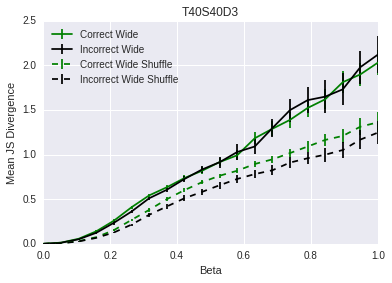

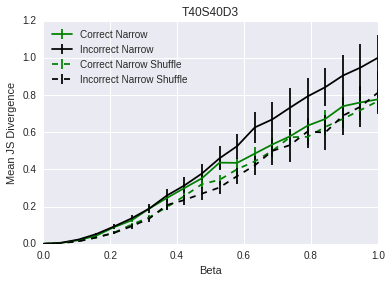

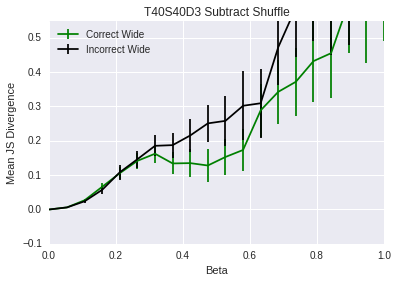

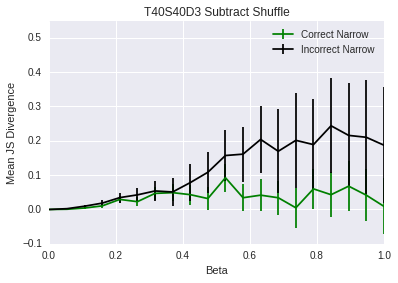

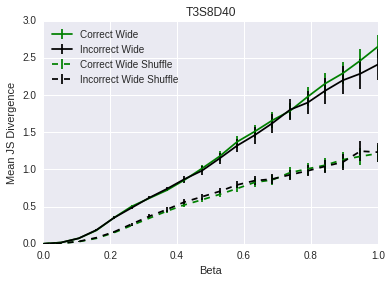

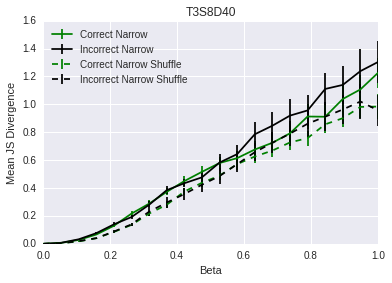

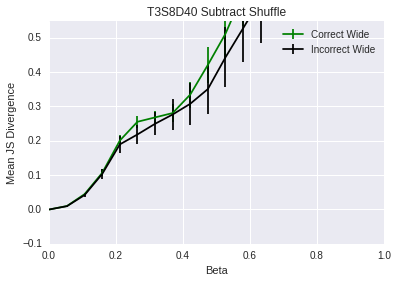

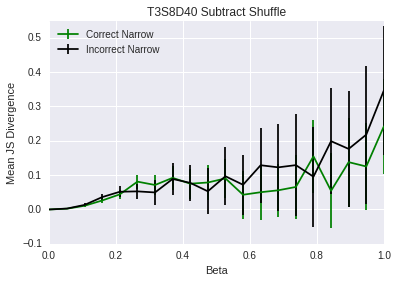

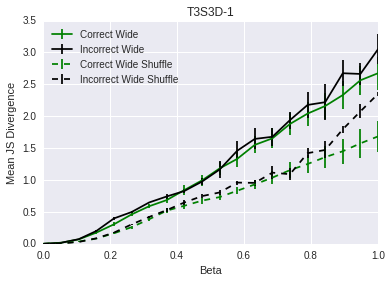

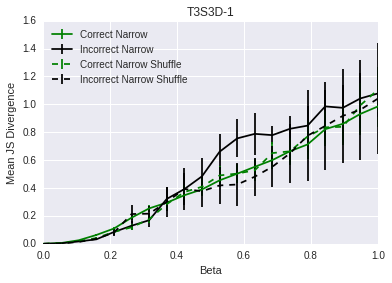

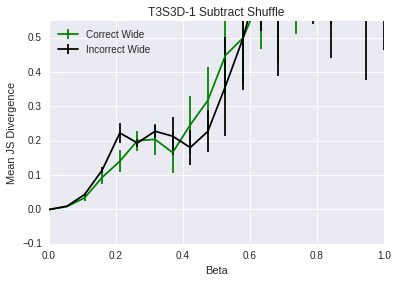

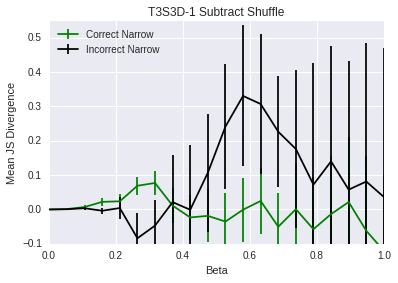

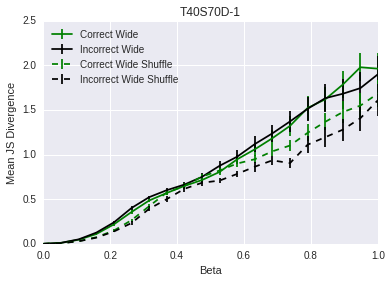

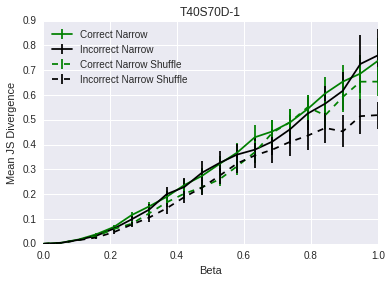

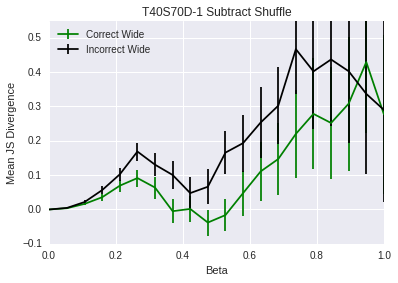

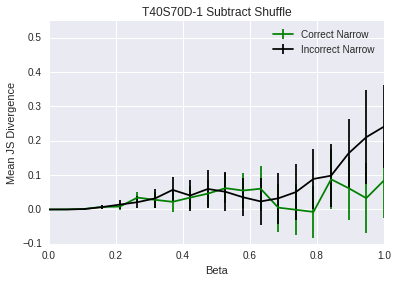

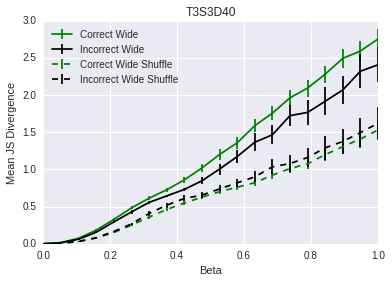

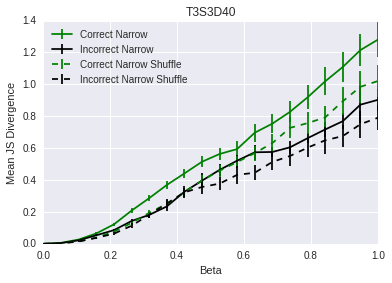

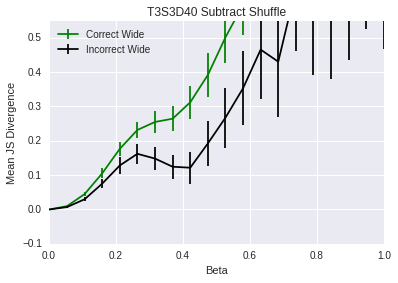

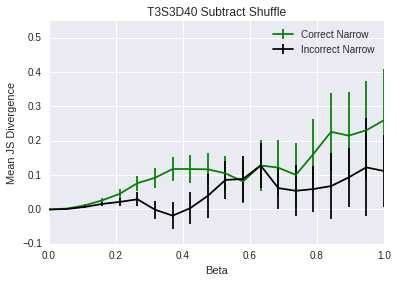

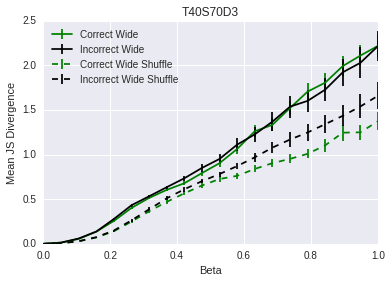

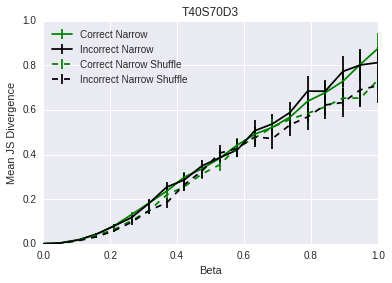

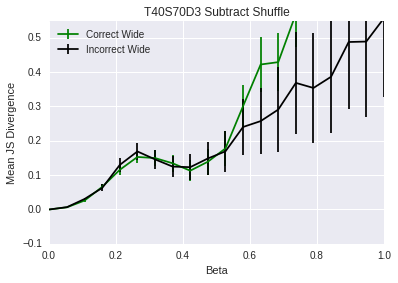

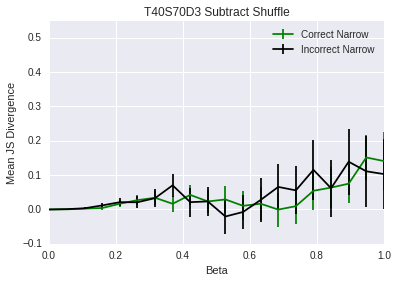

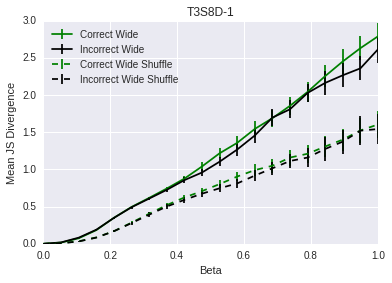

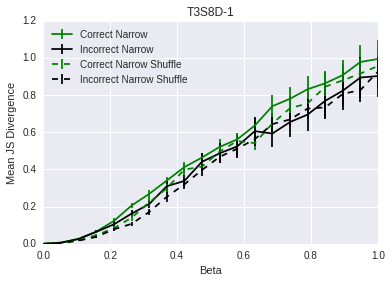

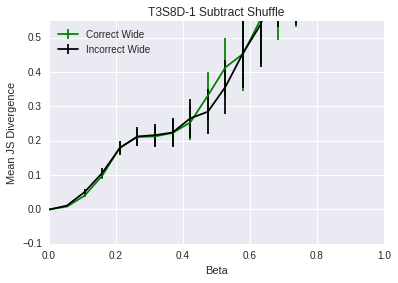

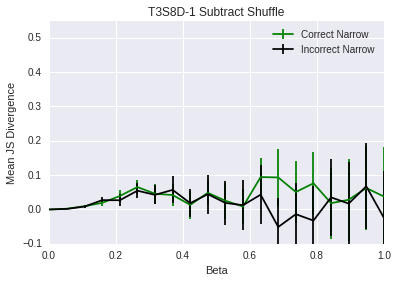

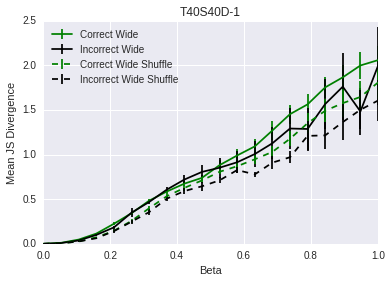

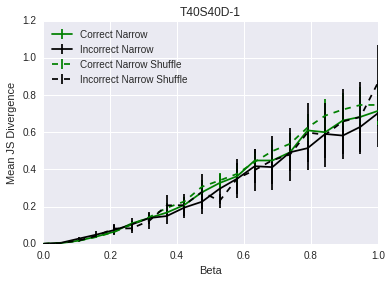

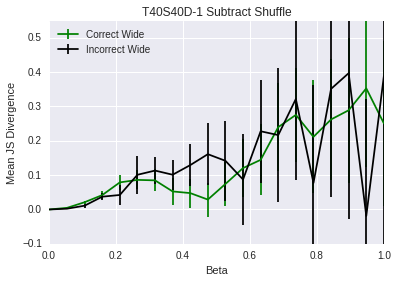

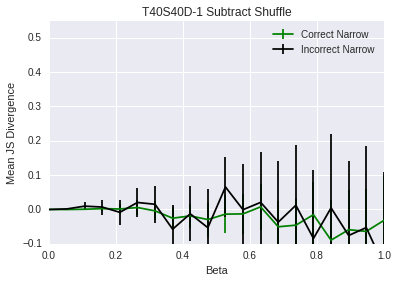

In [5]:
# Plot mean JSD on correct / Incorrect
#wide
with open('B604_1SLSE_pairwise_comparisons_version3_negativeBeta.pkl', 'r') as out:
    AllSave=pickle.load(out)
    
with open('B604_1SLSE_pairwise_comparisons_shuffled_negativeBeta.pkl', 'r') as out:
    AllSaveShuff=pickle.load(out)
    
#with open('B604_1SLSE_pairwise_comparisons.pkl', 'r') as out:
#    AllSave=pickle.load(out)
    
#with open('B604_1SLSE_pairwise_comparisons_shuffled.pkl', 'r') as out:
#    AllSaveShuff=pickle.load(out)

diffsave_wide = []
diffsave_narrow = []
diffsave_wide_correct = []
diffsave_wide_incorrect = []
diffsave_narrow_correct = []
diffsave_narrow_incorrect = []
dat_wide = {}
dat_narrow = {}
dat_wide_correct = {}
dat_narrow_correct = {}
dat_wide_incorrect = {}
dat_narrow_incorrect = {}
cw = AllSave['Targ-correct-wide.scg']
xw = AllSave['Targ-incorrect-wide.scg'] # incorrect
cn = AllSave['Targ-correct-narrow.scg']
xn = AllSave['Targ-incorrect-narrow.scg']
cws = AllSaveShuff['Targ-correct-wide-shuffle.scg']
cns = AllSaveShuff['Targ-correct-narrow-shuffle.scg']
xws = AllSaveShuff['Targ-incorrect-wide-shuffle.scg']
xns = AllSaveShuff['Targ-incorrect-narrow-shuffle.scg']
for stim in cw.keys():
    cwt = cw[stim]
    cnt = cn[stim]
    xwt = xw[stim]
    xnt = xn[stim] #trials
    
    cwts = cws[stim]
    cnts = cns[stim]
    xwts = xws[stim]
    xnts = xns[stim] #trials
   
    meanJSD_cw = np.mean(cwt, axis=1)
    meanJSD_cn = np.mean(cnt, axis=1)
    meanJSD_xw = np.mean(xwt, axis=1)
    meanJSD_xn = np.mean(xnt, axis=1)
    semJSD_cw = np.std(cwt, axis=1) / np.sqrt(np.shape(cwt)[1])
    semJSD_cn = np.std(cnt, axis=1) / np.sqrt(np.shape(cnt)[1])
    semJSD_xw = np.std(xwt, axis=1) / np.sqrt(np.shape(xwt)[1])
    semJSD_xn = np.std(xnt, axis=1) / np.sqrt(np.shape(xnt)[1])
    
    meanJSD_cws = np.mean(cwts, axis=1)
    meanJSD_cns = np.mean(cnts, axis=1)
    meanJSD_xws = np.mean(xwts, axis=1)
    meanJSD_xns = np.mean(xnts, axis=1)
    semJSD_cws = np.std(cwts, axis=1) / np.sqrt(np.shape(cwts)[1])
    semJSD_cns = np.std(cnts, axis=1) / np.sqrt(np.shape(cnts)[1])
    semJSD_xws = np.std(xwts, axis=1) / np.sqrt(np.shape(xwts)[1])
    semJSD_xns = np.std(xnts, axis=1) / np.sqrt(np.shape(xnts)[1])
    
    semJSD_diff_cw = np.sqrt(np.square(semJSD_cw) + np.square(semJSD_cws))
    semJSD_diff_xw = np.sqrt(np.square(semJSD_xw) + np.square(semJSD_xws))
    semJSD_diff_cn = np.sqrt(np.square(semJSD_cn) + np.square(semJSD_cns))
    semJSD_diff_xn = np.sqrt(np.square(semJSD_xn) + np.square(semJSD_xns))
    
    plt.figure()
    plt.errorbar(betas, meanJSD_cw, yerr=semJSD_cw, fmt='g', label='Correct Wide')
    plt.errorbar(betas, meanJSD_xw, yerr=semJSD_xw, fmt='k', label='Incorrect Wide')
    plt.errorbar(betas, meanJSD_cws, yerr=semJSD_cws, fmt='g--', label='Correct Wide Shuffle')
    plt.errorbar(betas, meanJSD_xws, yerr=semJSD_xws, fmt='k--', label='Incorrect Wide Shuffle')
    plt.title(stim)
    plt.legend(loc='best')
    plt.xlabel('Beta')
    plt.ylabel('Mean JS Divergence')
    plt.savefig('/home/brad/figures/figures_v2/B604_P01S15_meanJSD_dim1_negativeB_CvsX_wide_{}.png'.format(stim))
    
    plt.figure()
    plt.errorbar(betas, meanJSD_cn, yerr=semJSD_cn, fmt='g', label='Correct Narrow')
    plt.errorbar(betas, meanJSD_xn, yerr=semJSD_xn, fmt='k', label='Incorrect Narrow')
    plt.errorbar(betas, meanJSD_cns, yerr=semJSD_cns, fmt='g--', label='Correct Narrow Shuffle')
    plt.errorbar(betas, meanJSD_xns, yerr=semJSD_xns, fmt='k--', label='Incorrect Narrow Shuffle')
    plt.title(stim)
    plt.legend(loc='best')
    plt.xlabel('Beta')
    plt.ylabel('Mean JS Divergence')
    plt.savefig('/home/brad/figures/figures_v2/B604_P01S15_meanJSD_dim1_negativeB_CvsX_narrow_{}.png'.format(stim))
    
    plt.figure()
    plt.errorbar(betas, meanJSD_cw - meanJSD_cws, yerr=semJSD_diff_cw, fmt='g', label='Correct Wide')
    plt.errorbar(betas, meanJSD_xw - meanJSD_xws, yerr=semJSD_diff_xw, fmt='k', label='Incorrect Wide')
    plt.title(stim +' Subtract Shuffle')
    plt.legend(loc='best')
    plt.xlabel('Beta')
    plt.ylabel('Mean JS Divergence')
    plt.ylim([-0.1, 0.55])
    plt.savefig('/home/brad/figures/figures_v2/B604_P01S15_meanJSD_dim1_negativeB_subShuff_CvsX_wide_{}.png'.format(stim))
    
    plt.figure()
    plt.errorbar(betas, meanJSD_cn - meanJSD_cns, yerr=semJSD_diff_cn, fmt='g', label='Correct Narrow')
    plt.errorbar(betas, meanJSD_xn - meanJSD_xns, yerr=semJSD_diff_xn, fmt='k', label='Incorrect Narrow')
    plt.title(stim +' Subtract Shuffle')
    plt.legend(loc='best')
    plt.xlabel('Beta')
    plt.ylabel('Mean JS Divergence')
    plt.ylim([-0.1, 0.55])
    plt.savefig('/home/brad/figures/figures_v2/B604_P01S15_meanJSD_dim1_negativeB_subShuff_CvsX_narrow_{}.png'.format(stim))